In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,NaN,NaN,NaN,...,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,Gas
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Oil,NaN,NaN,...,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Oil,NaN,NaN,...,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,Coal
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coal


We have to predict the primary fuel, based on the other attributes in the datatset, so this problem is a classification problem.

In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source', 'estimated_generation_gwh', 'primary_fuel'],
      dtype='object')

In [4]:
df.head(15)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,NaN,NaN,NaN,...,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,Gas
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Oil,NaN,NaN,...,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,Coal
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Oil,NaN,NaN,...,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN,Coal
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,NaN,NaN,NaN,...,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN,Hydro
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,NaN,NaN,NaN,...,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN,Hydro
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,NaN,NaN,NaN,...,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN,Hydro
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Oil,NaN,NaN,...,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN,Coal


In [5]:
df.sample()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,primary_fuel
139,IND,India,CHANDERIA SMELTER,WRI1019887,234.0,24.9637,74.6656,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coal


In [6]:
df.tail(14)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,primary_fuel
893,IND,India,WY.CANAL A -D,IND0000510,62.40,30.3033,77.5684,NaN,NaN,NaN,...,NaN,184.45310,183.000000,204.253600,175.866250,236.49160,NaN,Central Electricity Authority,NaN,Hydro
894,IND,India,Wadgam Solar Power Plant,WRI1026220,15.00,22.3172,72.4397,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
895,IND,India,Warora Solar Power Plant,WRI1026221,25.00,20.3010,79.0237,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
896,IND,India,Weizzmann Forex Idukki Wind Farm,WRI1026760,3.60,9.8881,77.2216,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
897,IND,India,Wind power project by Riddhi Siddhi Gluco Biol...,WRI1026753,34.65,8.8709,77.4466,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
898,IND,India,Wind power project in Rajasthan,WRI1026769,42.00,27.1715,70.6877,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
899,IND,India,YAMUNANAGAR TPP,IND0000511,600.00,30.1081,77.3257,Oil,NaN,NaN,...,NaN,3194.35982,3709.552200,3123.572061,3156.053669,3039.66118,NaN,Central Electricity Authority,NaN,Coal
900,IND,India,YASHWANTRAO MOHITE,WRI1019995,16.00,17.1653,74.2456,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biomass
901,IND,India,YELHANKA (DG),IND0000512,106.60,13.1156,77.5838,NaN,NaN,NaN,...,NaN,0.00000,0.000000,0.000000,NaN,0.00000,NaN,Central Electricity Authority,NaN,Oil
902,IND,India,YERMARUS TPP,IND0000513,1600.00,16.2949,77.3568,Oil,NaN,NaN,...,NaN,NaN,0.994875,233.596650,865.400000,686.50000,NaN,Central Electricity Authority,NaN,Coal


# EXPLORATORY DATA ANALYSIS 

In [7]:
df.shape

(907, 27)

In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source', 'estimated_generation_gwh', 'primary_fuel'],
      dtype='object')

In [13]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
primary_fuel                0
dtype: int64

Dropping columns, that doesnt have values in them.

In [22]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,NaN,NaN,NaN,...,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,Gas
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Oil,NaN,NaN,...,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Oil,NaN,NaN,...,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,Coal
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coal


In [23]:
df.drop(['other_fuel2', 'other_fuel1', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'], axis=1, inplace=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,Gas
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,Coal
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coal


In [25]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
primary_fuel                0
dtype: int64

In [26]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
primary_fuel               object
dtype: object

In [27]:
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numeric_cols = df.select_dtypes(include='float64').columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

missing_values = df.isnull().sum()
print("Remaining missing values:\n", missing_values)


Remaining missing values:
 country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
primary_fuel              0
dtype: int64


In [28]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,Gas
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,Coal
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal


In [30]:
df['commissioning_year'] = df['commissioning_year'].round(2)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,2011.00,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1997.09,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,1997.09,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2004.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,Gas
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,2015.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,2016.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,Coal
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,1997.09,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,1997.09,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1997.09,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   commissioning_year      907 non-null    float64
 8   owner                   907 non-null    object 
 9   source                  907 non-null    object 
 10  url                     907 non-null    object 
 11  geolocation_source      907 non-null    object 
 12  year_of_capacity_data   907 non-null    float64
 13  generation_gwh_2014     907 non-null    float64
 14  generation_gwh_2015     907 non-null    fl

In [32]:
for i in df.columns:
    print(df[i].unique())
    print('\n')
    print(df[i].nunique())
    print('\n')

['IND']


1


['India']


1


['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'BADARPUR' 'BAGALKOT ICP'
 'BAGLIHAR HEP' 'BAGLIHAR HEP-II' 'BAIRA SIUL' 'BAKRESWAR' 'BALCO TPP'
 'B

<Axes: xlabel='capacity_mw', ylabel='latitude'>

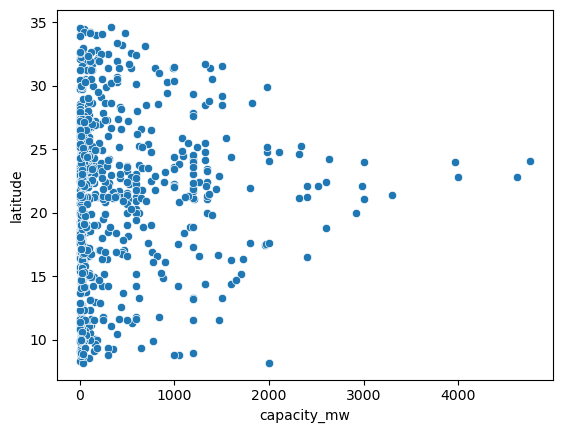

In [34]:
sns.scatterplot(y="latitude",x="capacity_mw",data=df)

For all the given latitude values in the dataset, the capacity in megawatt ranges mostly from 0-1000 units.

<Axes: xlabel='commissioning_year', ylabel='capacity_mw'>

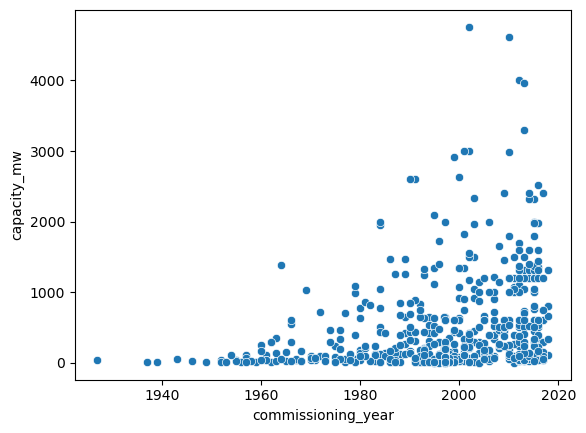

In [37]:
sns.scatterplot(x="commissioning_year",y="capacity_mw",data=df)

The capacity has been gradually increased starting from year 1940 and it has reached maximum in 2020.

<Axes: xlabel='year_of_capacity_data', ylabel='longitude'>

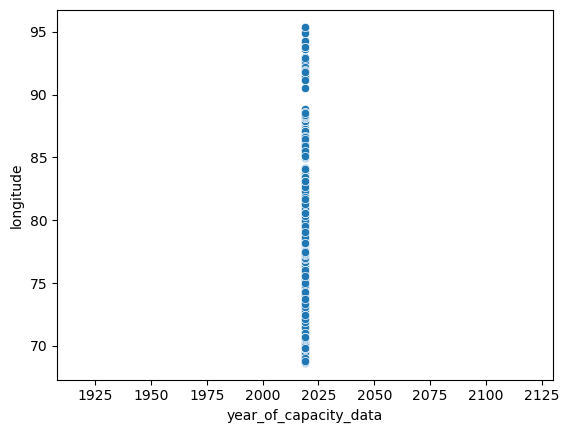

In [38]:
sns.scatterplot(x="year_of_capacity_data",y="longitude",data=df)

In [39]:
unique_value_counts = df.nunique()

print(unique_value_counts)

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  837
longitude                 828
commissioning_year         74
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       372
generation_gwh_2015       397
generation_gwh_2016       404
generation_gwh_2017       409
generation_gwh_2018       411
generation_data_source      1
primary_fuel                8
dtype: int64


<Axes: xlabel='geolocation_source', ylabel='capacity_mw'>

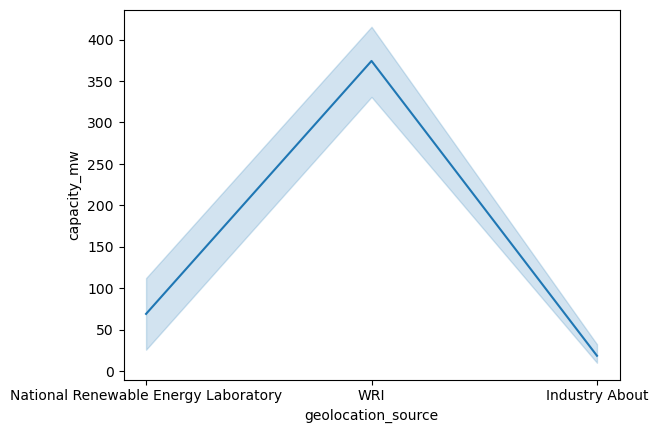

In [40]:
sns.lineplot(x="geolocation_source",y="capacity_mw",data=df)

<Axes: xlabel='geolocation_source', ylabel='capacity_mw'>

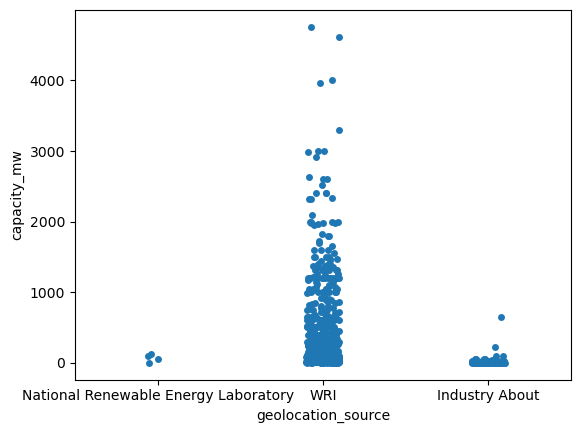

In [42]:
sns.stripplot(x="geolocation_source",y="capacity_mw",data=df)

The WRI geolocation has the highest capacity in mw , the other two geosource has the least capacity.

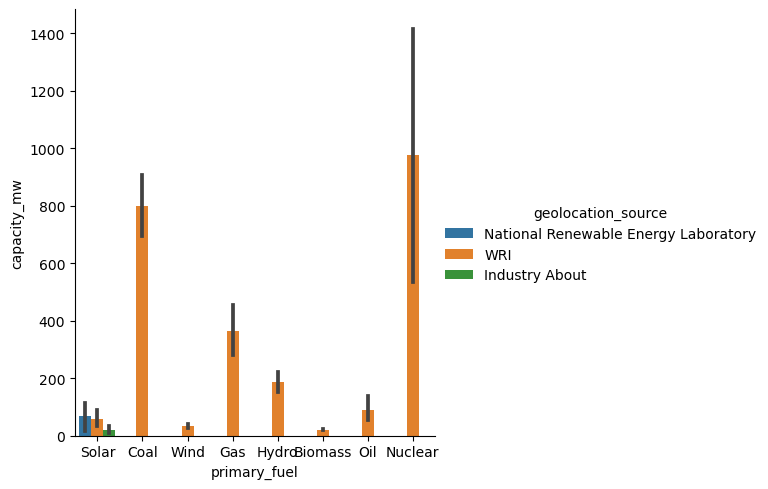

In [46]:
sns.catplot(y="capacity_mw",hue="geolocation_source",x="primary_fuel",data=df,kind="bar")

All 3 geolocation sources has solar fuel, but only WRI source has all other fuels also.

<Axes: xlabel='generation_gwh_2016', ylabel='Count'>

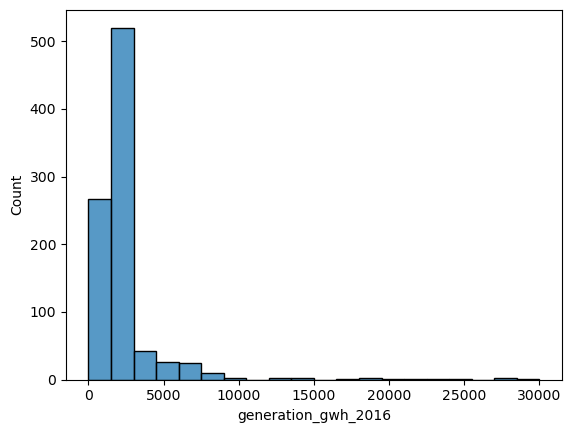

In [50]:
sns.histplot(x="generation_gwh_2016",data=df,bins=20)

<Axes: xlabel='generation_gwh_2017', ylabel='Count'>

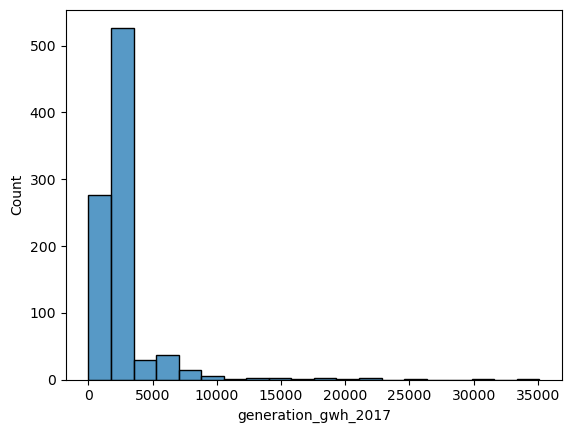

In [51]:
sns.histplot(x="generation_gwh_2017",data=df,bins=20)

<Axes: xlabel='generation_gwh_2018', ylabel='Count'>

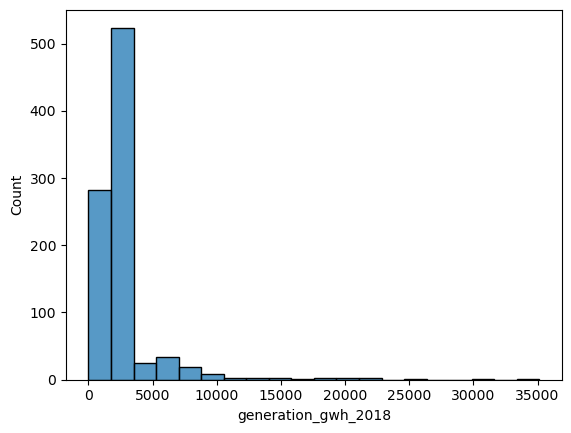

In [52]:
sns.histplot(x="generation_gwh_2018",data=df,bins=20)

<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

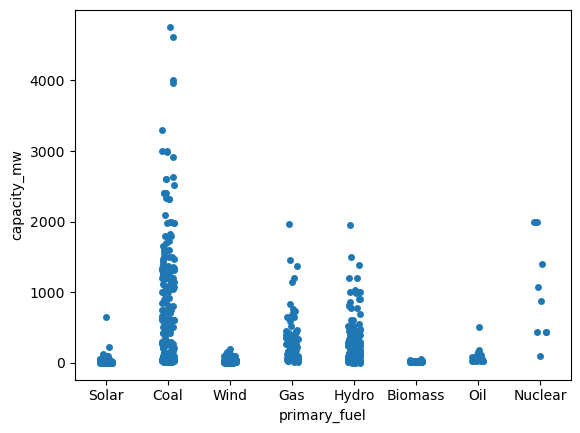

In [54]:
sns.stripplot(x="primary_fuel",y="capacity_mw",data=df)

Coal produces the highest capacity in the given dataset.

<Axes: xlabel='primary_fuel', ylabel='year_of_capacity_data'>

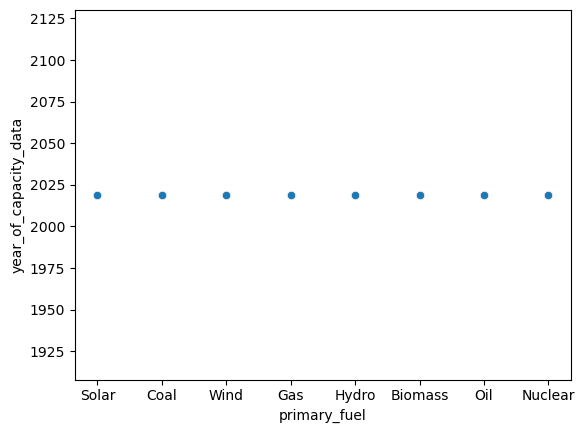

In [56]:
sns.scatterplot(x="primary_fuel",y="year_of_capacity_data",data=df)

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

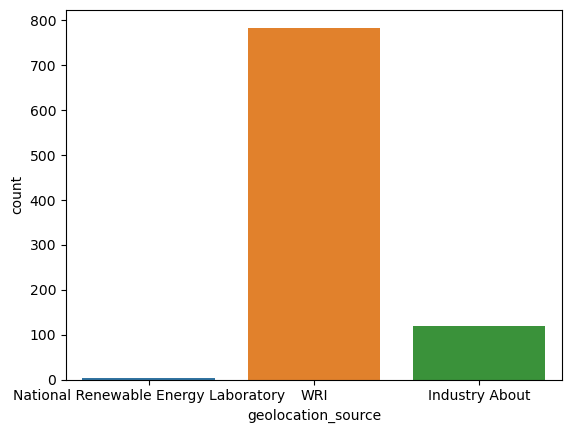

In [57]:
sns.countplot(x="geolocation_source", data = df)
df['geolocation_source'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

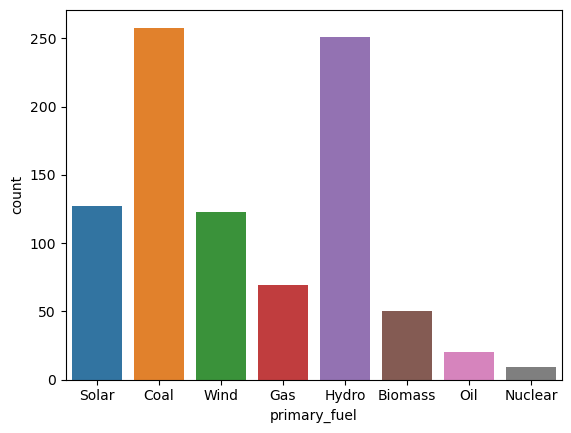

In [58]:
sns.countplot(x="primary_fuel", data = df)
df['primary_fuel'].value_counts()

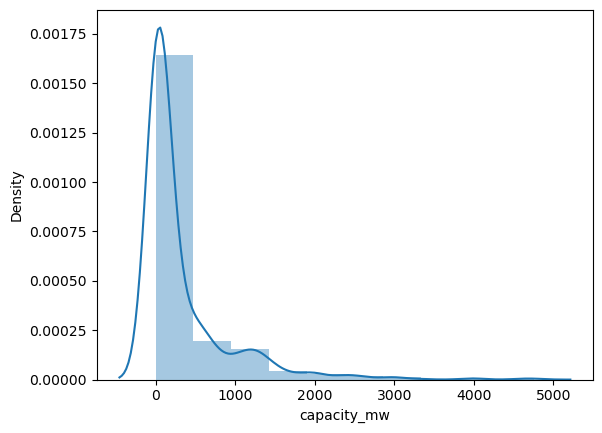

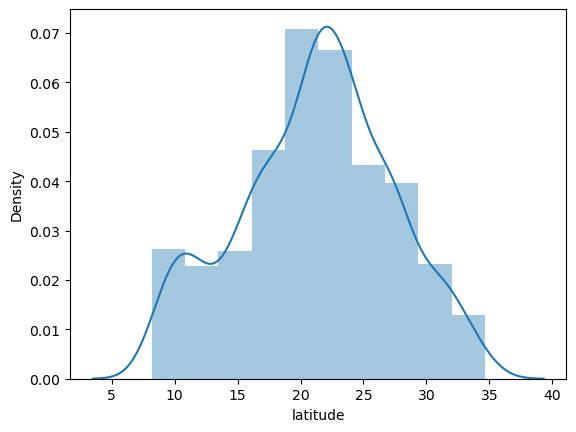

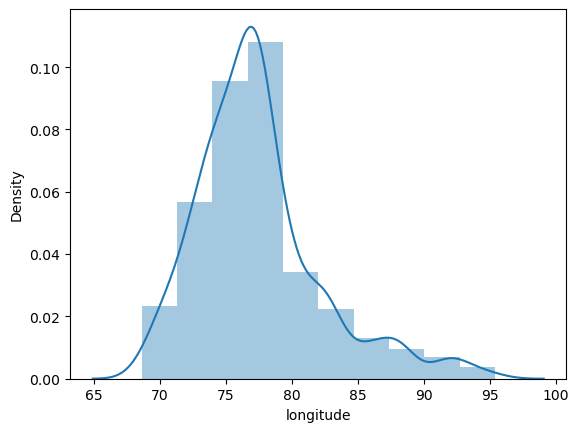

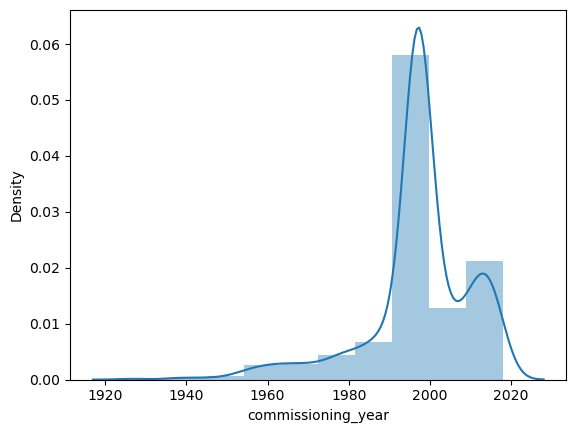

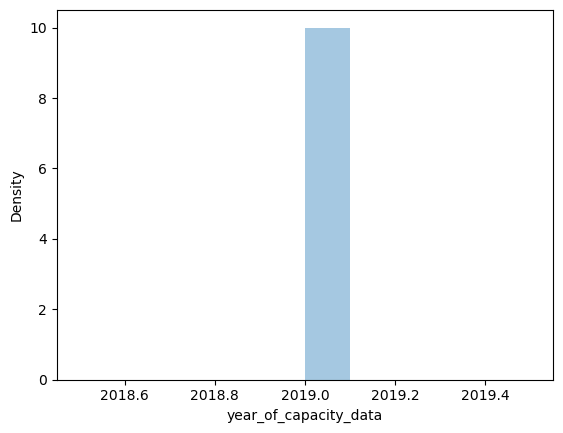

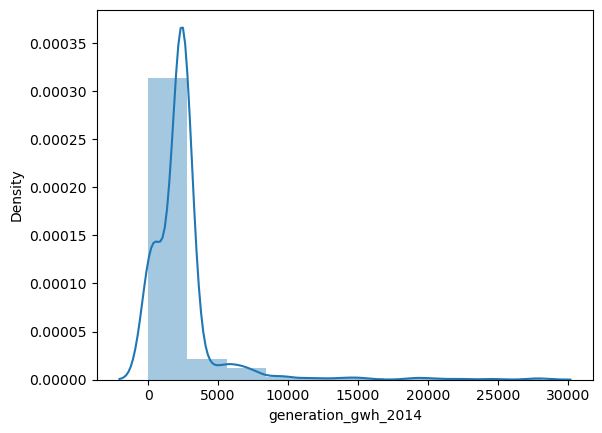

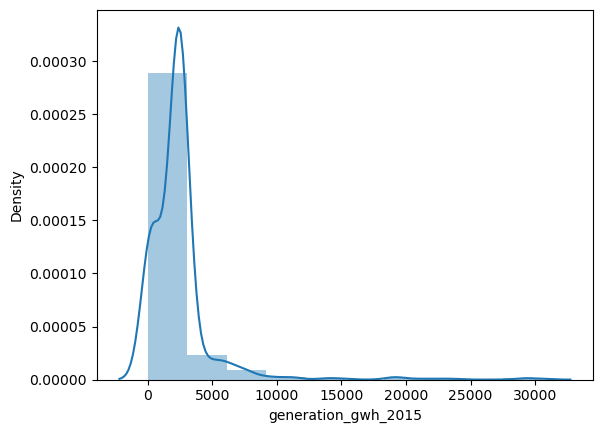

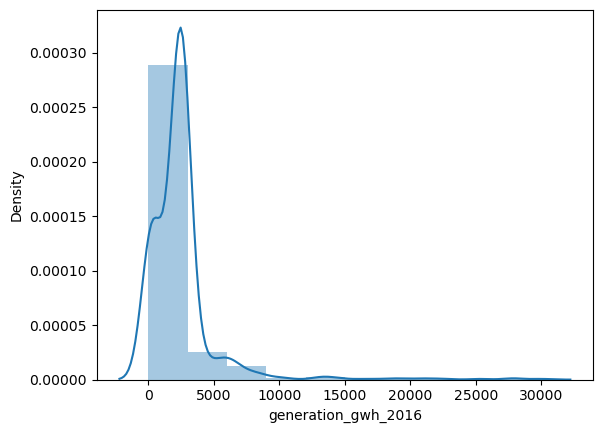

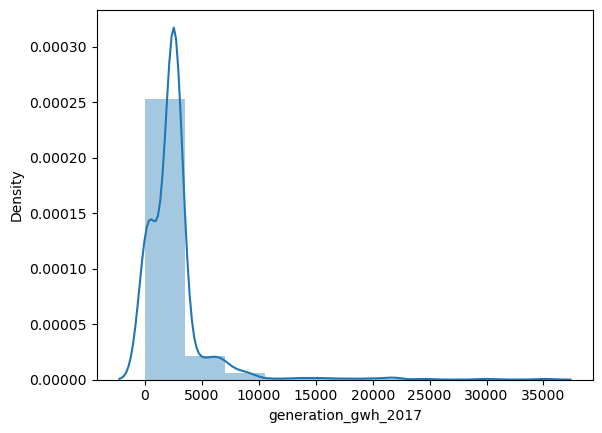

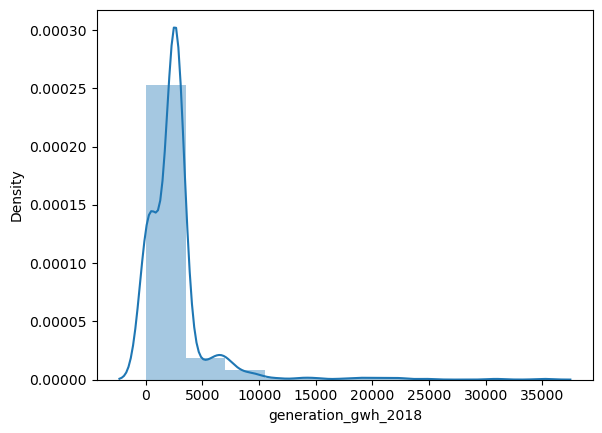

In [59]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        sns.distplot(df[i], bins=10) 
        plt.show()  
    print('\n')

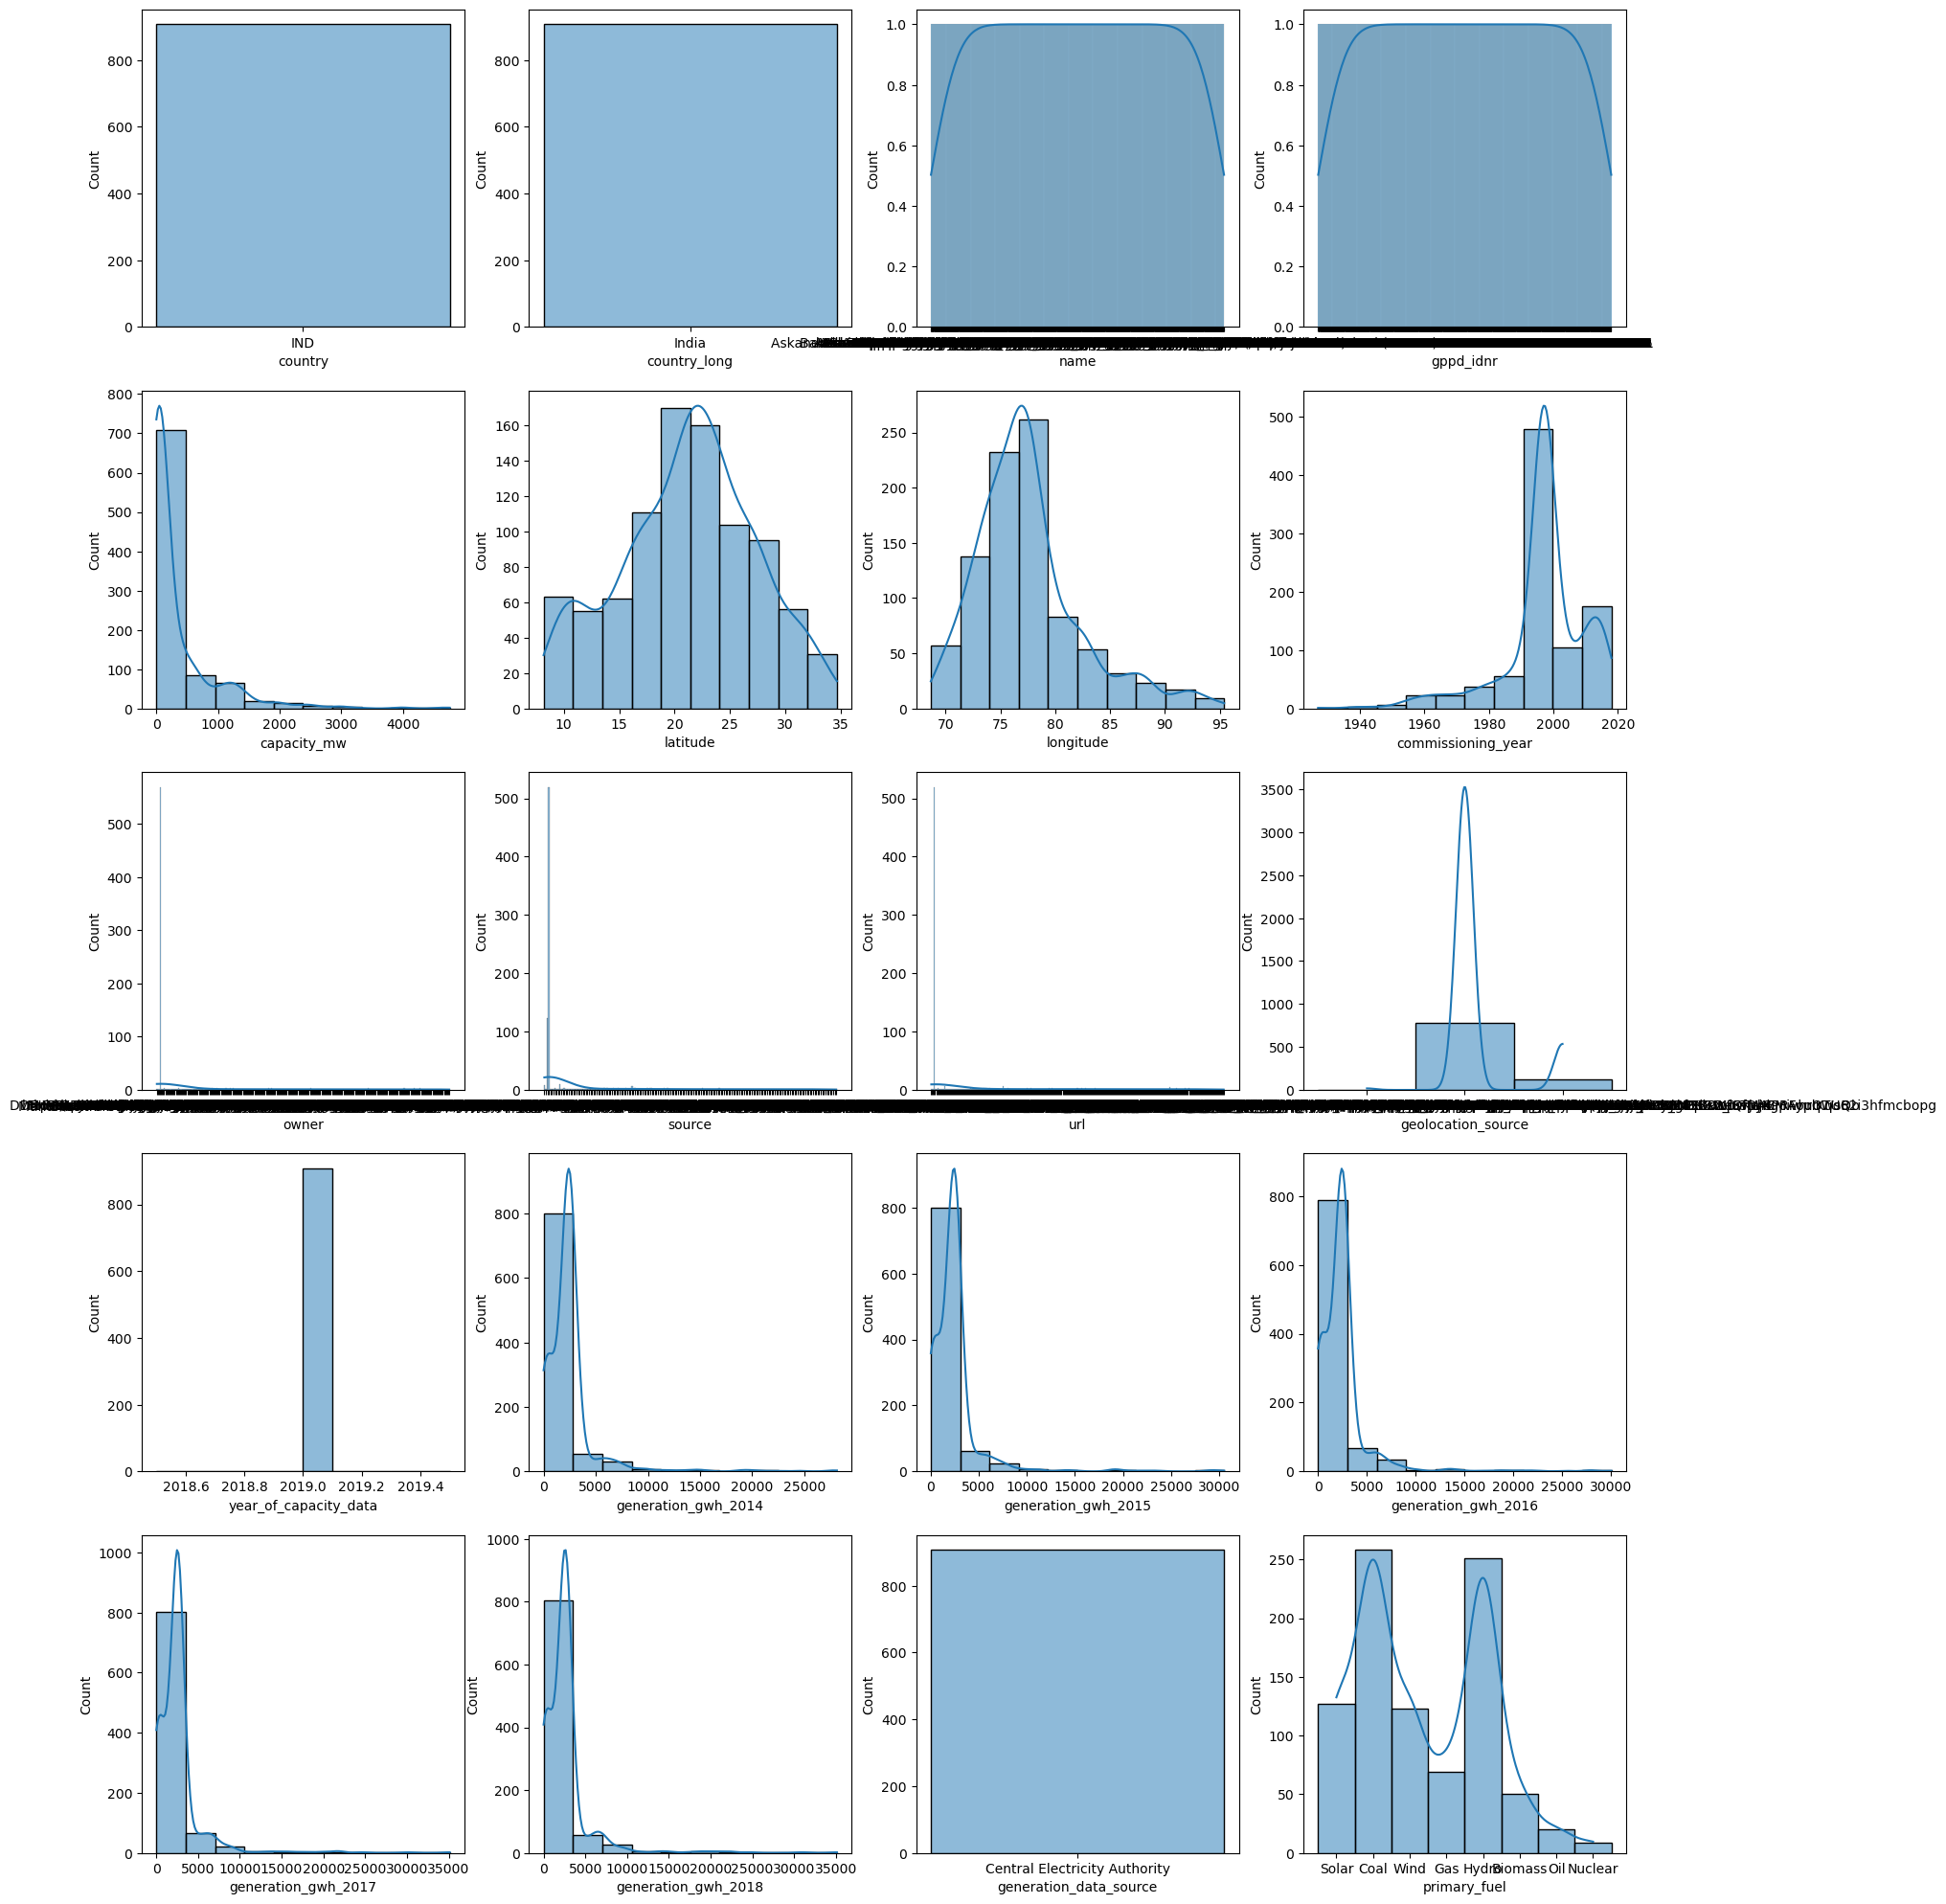

In [61]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=20:
        plt.subplot(5,4,p)
        sns.histplot(df[i], bins=10, kde=True, palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
    
plt.show()

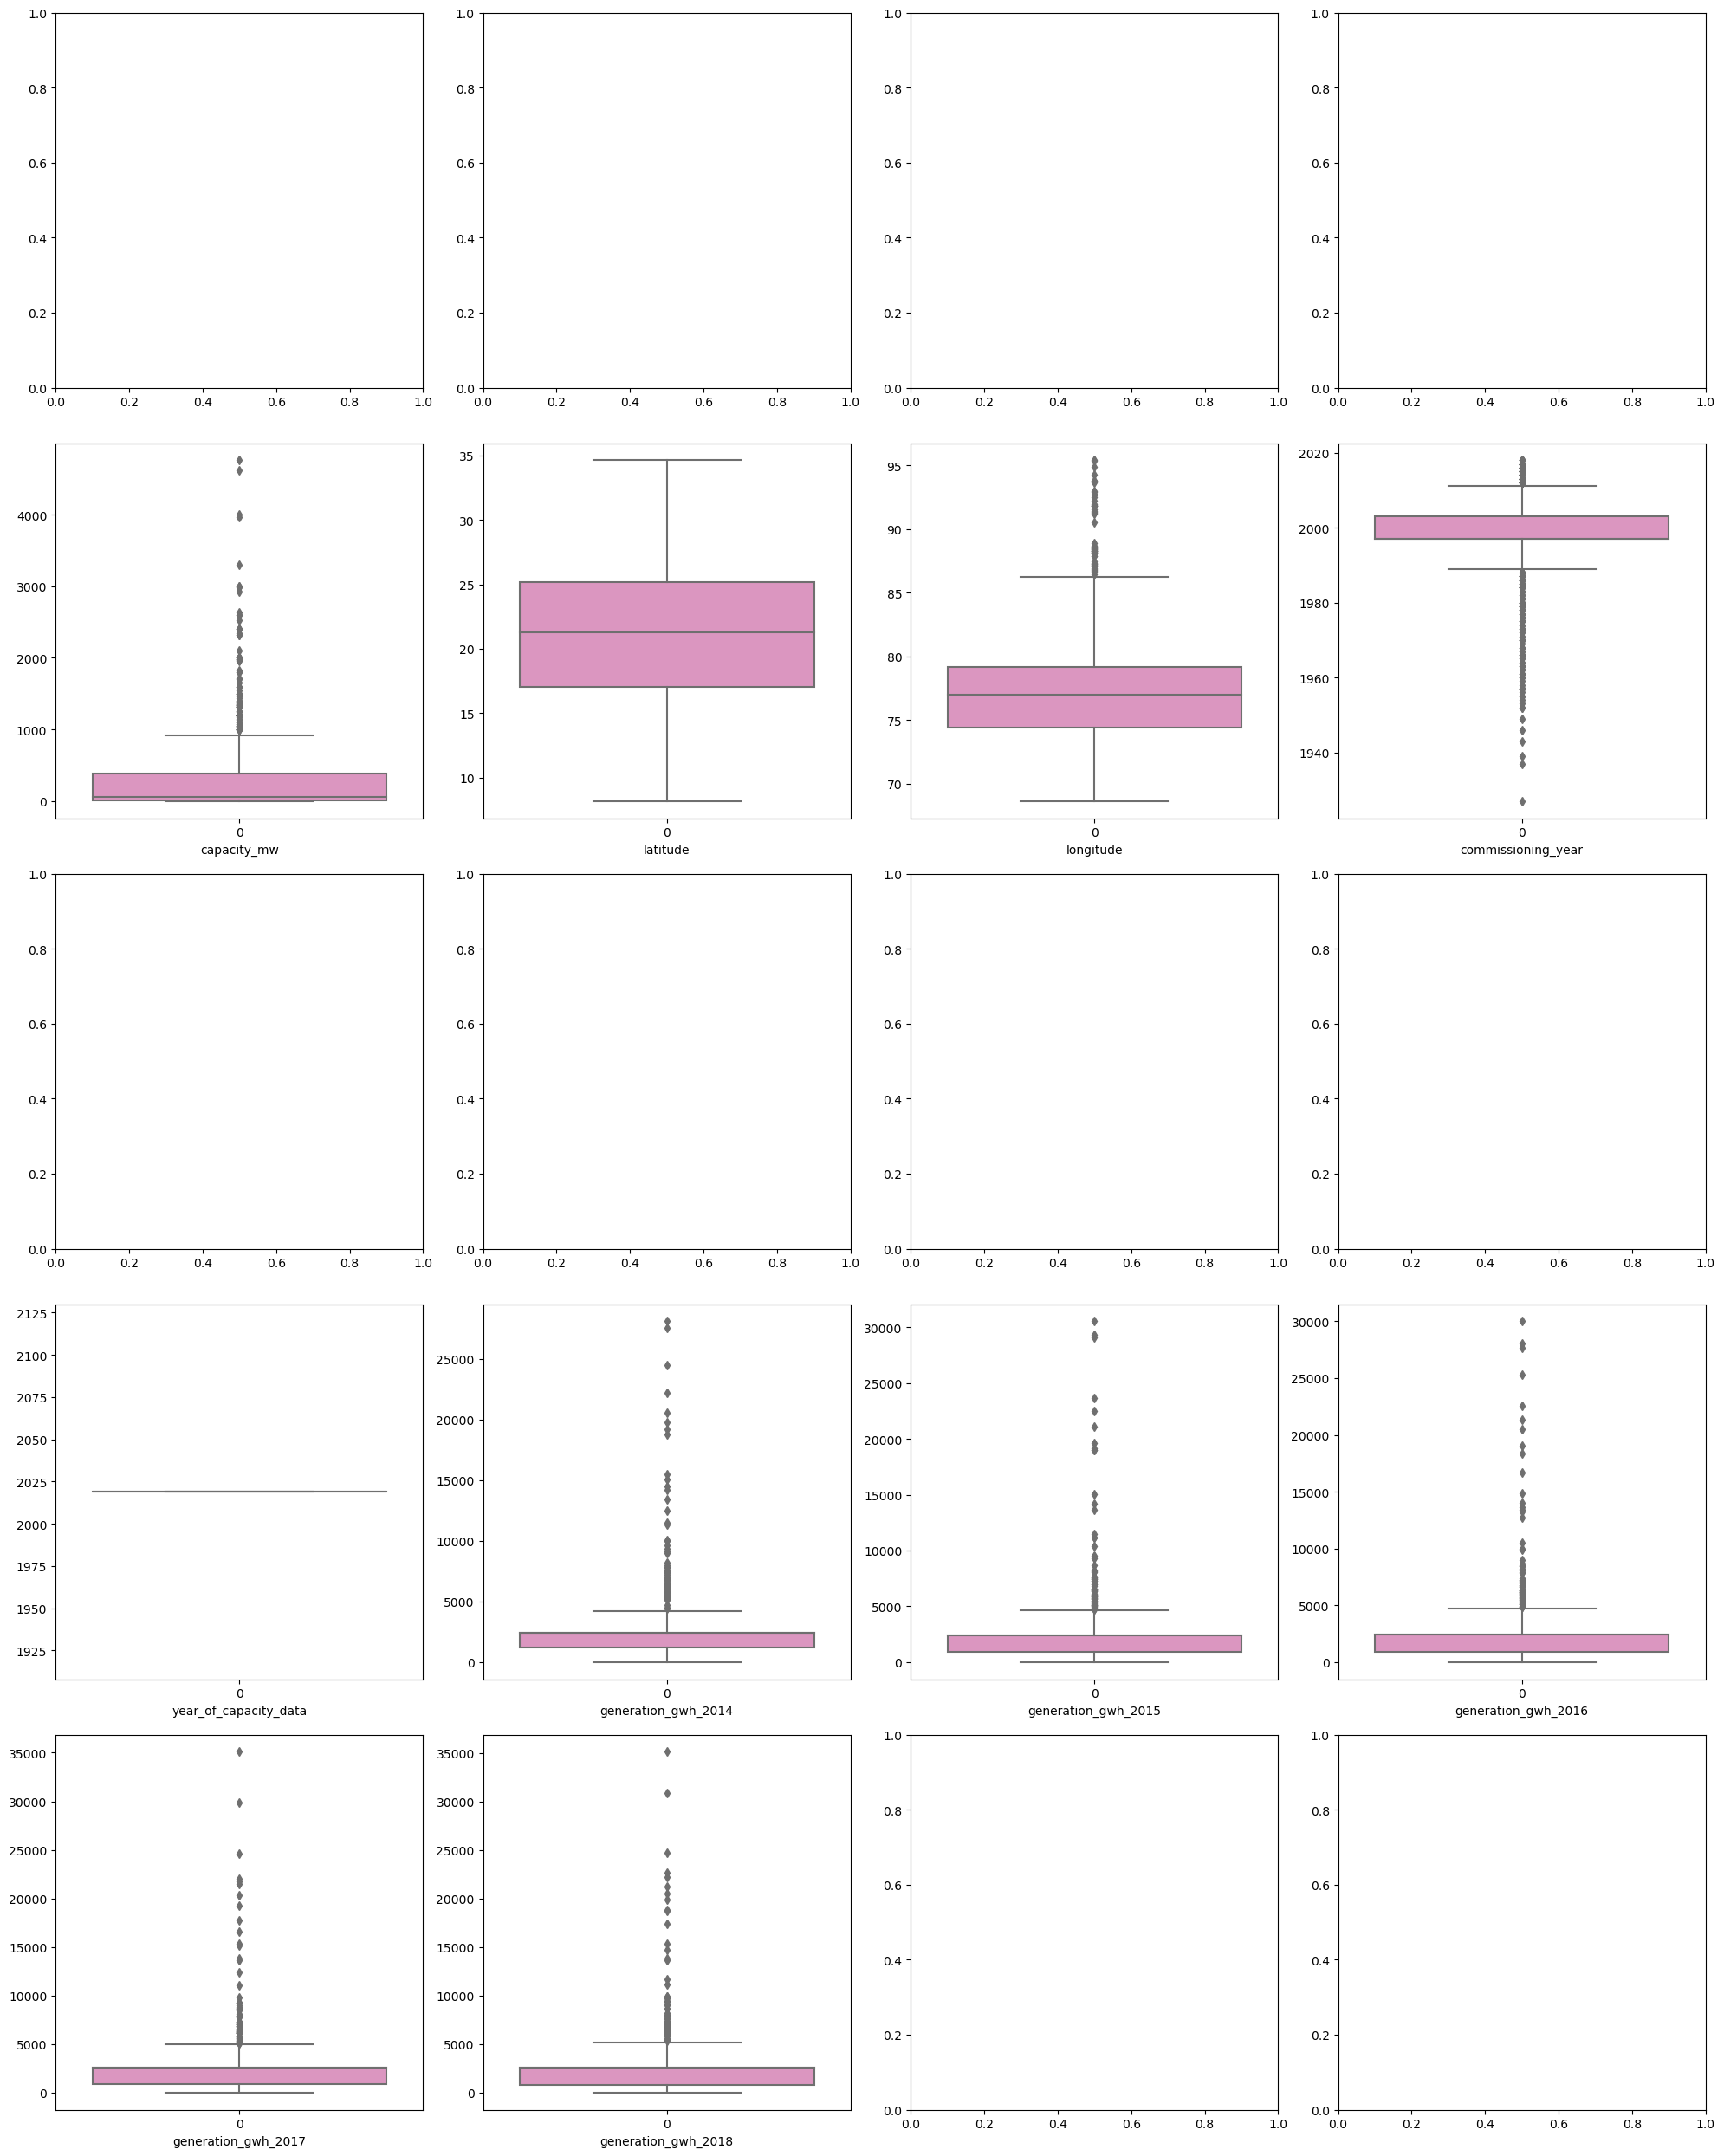

In [63]:
#Checking outliers using boxplot
plt.figure(figsize=(20, 25))
p = 1

for i in df.columns:
    if p <= 20:
        plt.subplot(5, 4, p)

        if df[i].dtype in ['float64', 'int64']:
            sns.boxplot(df[i], palette='Set2_r')
            plt.xlabel(i)
    p += 1

plt.tight_layout()
plt.show()

There are definitely outliers, that can be seen thrugh the above graph, we can remove them using zscore method.

In [81]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,2011.00,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1997.09,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,1997.09,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2004.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,Gas
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,2015.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,2016.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,Coal
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,1997.09,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,1997.09,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1997.09,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal


In [83]:
from scipy.stats import zscore 
out_features = df[['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]
z=np.abs(zscore(out_features))
z[np.isnan(z)] = 0
z

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,1.149805,0.878280,1.069196,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000
1,0.386977,0.587311,0.593788,0.000048,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000
2,0.486679,0.116179,1.682394,0.000048,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000
3,0.324240,0.439989,2.889052,0.531115,0.0,6.809773e-01,5.544458e-01,5.499881e-01,0.645224,0.651857
4,2.498942,0.125479,1.027976,1.376672,0.0,2.266352e-01,1.220581e+00,1.312471e+00,0.971893,1.544399
...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,1.453540,0.0,1.707094e-16,8.493441e-01,7.768097e-01,0.576172,0.631964
903,0.548060,1.366853,0.145644,0.000048,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000
904,0.509909,0.974707,0.391673,0.000048,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000
905,0.417498,0.518793,0.772866,0.000048,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000


In [84]:
np.where(z>3)

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
        179, 183, 209, 209, 209, 209, 209, 209, 222, 244, 308, 308, 308,
        308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364, 364,
        364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493,
        493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 538,
        541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648, 648, 648,
        648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695,
        695, 706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
        726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786,
        788, 807, 808, 808, 808, 808, 808, 808, 818, 847, 848, 880, 880,
        880, 880, 880, 880], dtype=int64),
 array([0, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 0, 5, 2, 2, 0, 5, 6, 7, 8, 9, 3,
        2, 0, 5, 6, 7, 8, 9, 2, 2, 2, 3, 2, 0, 0, 5, 6, 7, 8, 9, 3, 0, 2,
        2, 3, 3, 3, 0, 3, 0, 5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 2, 2, 3, 3,
     

In [85]:
df1 = df[(z<3).all(axis = 1)]
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,2011.00,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1997.09,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,1997.09,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2004.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,Gas
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,2015.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,2016.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,Coal
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,1997.09,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,1997.09,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1997.09,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal


# Checking for skewness

In [86]:
df1.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
primary_fuel               object
dtype: object

In [87]:
df1.skew()

capacity_mw              1.979914
latitude                -0.109823
longitude                0.921980
commissioning_year      -0.845517
year_of_capacity_data    0.000000
generation_gwh_2014      1.526648
generation_gwh_2015      1.389889
generation_gwh_2016      1.413144
generation_gwh_2017      1.278735
generation_gwh_2018      1.315481
dtype: float64

In [88]:
from scipy.stats import boxcox 

df1['capacity_mw'], _ = boxcox(df1['capacity_mw'] + 1)  
df1['longitude'], _ = boxcox(df1['longitude'] + 1)  
df1['generation_gwh_2014'], _ = boxcox(df1['generation_gwh_2014'] + 1)
df1['generation_gwh_2015'], _ = boxcox(df1['generation_gwh_2015'] + 1)  
df1['generation_gwh_2016'], _ = boxcox(df1['generation_gwh_2016'] + 1)  
df1['generation_gwh_2017'], _ = boxcox(df1['generation_gwh_2017'] + 1)  
df1['generation_gwh_2018'], _ = boxcox(df1['generation_gwh_2018'] + 1)  

In [89]:
df1['commissioning_year'] = np.square(df1['commissioning_year']) 

In [90]:
df1.skew()

capacity_mw              0.015527
latitude                -0.109823
longitude                0.000000
commissioning_year      -0.820463
year_of_capacity_data    0.000000
generation_gwh_2014     -0.243975
generation_gwh_2015     -0.309166
generation_gwh_2016     -0.309194
generation_gwh_2017     -0.340677
generation_gwh_2018     -0.354764
dtype: float64

ENCODING ALL THE CATEGORICAL DATA

In [91]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))
    
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
0,0.0,0.0,0.0,600.0,1.232447,28.1839,0.231149,4.044121e+06,228.0,109.0,128.0,1.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,6.0
1,0.0,0.0,1.0,462.0,4.329544,24.7663,0.231149,3.988368e+06,257.0,174.0,173.0,2.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,1.0
2,0.0,0.0,2.0,795.0,3.520921,21.9038,0.231149,3.988368e+06,2.0,21.0,205.0,2.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,7.0
3,0.0,0.0,3.0,0.0,4.609929,23.8712,0.231149,4.016016e+06,5.0,22.0,58.0,2.0,2019.0,63.226981,68.085746,65.561639,56.298845,51.306628,0.0,2.0
4,0.0,0.0,4.0,1.0,6.806555,21.9603,0.231149,4.060225e+06,5.0,22.0,58.0,2.0,2019.0,156.402932,197.645128,186.312809,173.239464,185.677859,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,844.0,437.0,6.709663,16.2949,0.231149,4.064256e+06,5.0,22.0,58.0,2.0,2019.0,137.967319,0.836485,31.625412,65.010425,53.876227,0.0,1.0
903,0.0,0.0,845.0,764.0,1.361445,12.8932,0.231149,3.988368e+06,114.0,77.0,22.0,0.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,6.0
904,0.0,0.0,846.0,833.0,3.140531,15.2758,0.231149,3.988368e+06,5.0,21.0,260.0,2.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,7.0
905,0.0,0.0,847.0,482.0,4.151145,24.3500,0.231149,3.988368e+06,91.0,59.0,82.0,2.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,1.0


In [92]:
df1.dtypes

country                   float64
country_long              float64
name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
primary_fuel              float64
dtype: object

# Checking correlation

In [93]:
cor = df1.corr()
cor

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.325100,0.008111,-0.138173,0.018929,-0.020506,0.112502,-0.005866,0.052364,0.028966,NaN,0.058930,0.029976,0.028624,0.048725,0.034498,NaN,0.049526
gppd_idnr,NaN,NaN,0.325100,1.000000,-0.585589,-0.090999,-0.405150,0.003078,0.628604,0.402598,0.601207,-0.465397,NaN,0.304641,0.314143,0.297772,0.286036,0.291334,NaN,0.624729
capacity_mw,NaN,NaN,0.008111,-0.585589,1.000000,0.048305,0.337034,0.241696,-0.498275,-0.396832,-0.337128,0.477422,NaN,0.007156,-0.017282,0.004249,0.003924,-0.008845,NaN,-0.523672
latitude,NaN,NaN,-0.138173,-0.090999,0.048305,1.000000,-0.071742,0.102944,-0.061001,0.069393,-0.125811,-0.202748,NaN,0.052737,0.039807,0.044077,0.023759,0.030694,NaN,0.000041
longitude,NaN,NaN,0.018929,-0.405150,0.337034,-0.071742,1.000000,0.136095,-0.298603,-0.241851,-0.322273,0.301032,NaN,-0.117067,-0.136395,-0.096173,-0.107722,-0.102197,NaN,-0.406154
commissioning_year,NaN,NaN,-0.020506,0.003078,0.241696,0.102944,0.136095,1.000000,-0.029862,-0.011610,-0.026951,0.020857,NaN,0.117559,0.129391,0.174698,0.142169,0.138793,NaN,-0.148405
owner,NaN,NaN,0.112502,0.628604,-0.498275,-0.061001,-0.298603,-0.029862,1.000000,0.764899,0.406857,-0.373751,NaN,0.212194,0.230931,0.233075,0.233521,0.243279,NaN,0.270518
source,NaN,NaN,-0.005866,0.402598,-0.396832,0.069393,-0.241851,-0.011610,0.764899,1.000000,0.144960,-0.497655,NaN,0.166402,0.181096,0.182778,0.183127,0.190779,NaN,0.036949


In [95]:
cor['primary_fuel'].sort_values(ascending = False)

primary_fuel              1.000000
gppd_idnr                 0.624729
url                       0.586205
owner                     0.270518
generation_gwh_2018       0.051170
generation_gwh_2015       0.050236
generation_gwh_2017       0.049929
name                      0.049526
generation_gwh_2014       0.040284
generation_gwh_2016       0.039697
source                    0.036949
latitude                  0.000041
commissioning_year       -0.148405
longitude                -0.406154
geolocation_source       -0.478148
capacity_mw              -0.523672
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

In [96]:
#dropping NAN correlation with target variable column 
df1.drop(['country','country_long','year_of_capacity_data','generation_data_source'], axis=1, inplace=True)
df1

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel
0,0.0,600.0,1.232447,28.1839,0.231149,4.044121e+06,228.0,109.0,128.0,1.0,137.967319,121.666923,113.657441,116.201038,108.648473,6.0
1,1.0,462.0,4.329544,24.7663,0.231149,3.988368e+06,257.0,174.0,173.0,2.0,137.967319,121.666923,113.657441,116.201038,108.648473,1.0
2,2.0,795.0,3.520921,21.9038,0.231149,3.988368e+06,2.0,21.0,205.0,2.0,137.967319,121.666923,113.657441,116.201038,108.648473,7.0
3,3.0,0.0,4.609929,23.8712,0.231149,4.016016e+06,5.0,22.0,58.0,2.0,63.226981,68.085746,65.561639,56.298845,51.306628,2.0
4,4.0,1.0,6.806555,21.9603,0.231149,4.060225e+06,5.0,22.0,58.0,2.0,156.402932,197.645128,186.312809,173.239464,185.677859,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,844.0,437.0,6.709663,16.2949,0.231149,4.064256e+06,5.0,22.0,58.0,2.0,137.967319,0.836485,31.625412,65.010425,53.876227,1.0
903,845.0,764.0,1.361445,12.8932,0.231149,3.988368e+06,114.0,77.0,22.0,0.0,137.967319,121.666923,113.657441,116.201038,108.648473,6.0
904,846.0,833.0,3.140531,15.2758,0.231149,3.988368e+06,5.0,21.0,260.0,2.0,137.967319,121.666923,113.657441,116.201038,108.648473,7.0
905,847.0,482.0,4.151145,24.3500,0.231149,3.988368e+06,91.0,59.0,82.0,2.0,137.967319,121.666923,113.657441,116.201038,108.648473,1.0


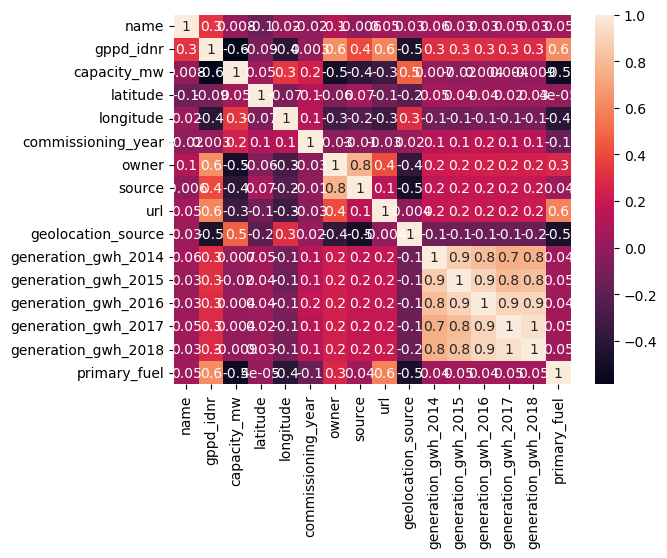

In [104]:
sns.heatmap(df1.corr(), annot = True, fmt = ".1g")
plt.show()

<Axes: >

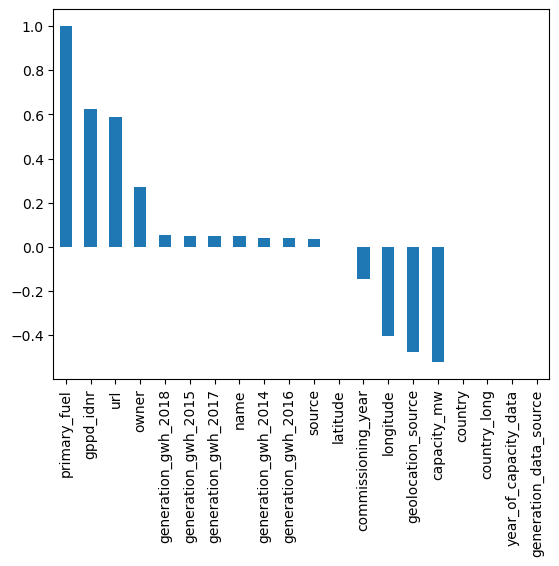

In [97]:
cor['primary_fuel'].sort_values(ascending = False).plot(kind='bar')

# Feature scaling and standardisation

In [98]:
x=df1.drop("primary_fuel", axis=1)
y=df1['primary_fuel']

In [99]:
x.shape

(849, 15)

In [100]:
y.shape

(849,)

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.730012,0.718118,-1.676571,1.159233,-0.928072,1.181136,2.014449,1.395536,0.432103,-1.034548,0.327200,0.356092,0.359399,0.360086,0.375133
1,-1.725932,0.155048,0.228490,0.599617,-0.509206,-0.074733,2.360753,2.818140,1.056786,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133
2,-1.721851,1.513760,-0.268904,0.130895,-2.364000,-0.074733,-0.684339,-0.530451,1.501005,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133
3,-1.717771,-1.730012,0.400958,0.453048,2.442077,0.548050,-0.648514,-0.508564,-0.539626,0.407704,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585
4,-1.713691,-1.725932,1.752129,0.140147,1.253967,1.543891,-0.648514,-0.508564,-0.539626,0.407704,0.665917,1.898269,1.935543,1.564919,2.122435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,1.713691,0.053043,1.692530,-0.787537,0.219867,1.634693,-0.648514,-0.508564,-0.539626,0.407704,0.327200,-2.096477,-1.420156,-0.721222,-0.867297
845,1.717771,1.387274,-1.597223,-1.344551,0.409530,-0.074733,0.653113,0.695177,-1.039372,-2.476800,0.327200,0.356092,0.359399,0.360086,0.375133
846,1.721851,1.668809,-0.502886,-0.954410,-0.235268,-0.074733,-0.648514,-0.530451,2.264506,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133
847,1.725932,0.236653,0.118754,0.531449,-0.768094,-0.074733,0.378458,0.301225,-0.206462,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133


In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.402639,name
1,4.502021,gppd_idnr
2,2.131005,capacity_mw
3,1.137624,latitude
4,1.327837,longitude
5,1.171892,commissioning_year
6,3.793274,owner
7,3.082580,source
8,2.124388,url
9,2.173011,geolocation_source


In [103]:
y.value_counts()

1.0    235
3.0    221
6.0    126
7.0    123
2.0     65
0.0     50
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    RFR  = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)

Best accuracy is 0.9058823529411765 at random state 197


In [106]:
!pip install imblearn 
from imblearn.over_sampling import SMOTE 
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [107]:
y1.value_counts()

6.0    235
1.0    235
7.0    235
2.0    235
3.0    235
0.0    235
5.0    235
4.0    235
Name: primary_fuel, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR  = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)
    

Best accuracy is 0.9485815602836879 at random state 45


Before sampling , the accuracy was 90% and after sampling the accuracy is 94%, so proceeding with the sampled class

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = rs) 


In [110]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

In [111]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9539007092198581
[[69  1  0  0  0  0  0  0]
 [ 4 53  5  4  1  0  0  0]
 [ 0  1 57  0  1  0  0  0]
 [ 0  4  2 70  3  0  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 0  0  0  0  0 66  0  0]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        70
         1.0       0.90      0.79      0.84        67
         2.0       0.89      0.97      0.93        59
         3.0       0.95      0.89      0.92        79
         4.0       0.93      1.00      0.97        71
         5.0       1.00      1.00      1.00        66
         6.0       1.00      1.00      1.00        75
         7.0       1.00      1.00      1.00        77

    accuracy                           0.95       564
   macro avg       0.95      0.95      0.95       564
weighted avg       0.95      0.95      0.95       564



In [112]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.9663120567375887
[[70  0  0  0  0  0  0  0]
 [ 4 55  4  4  0  0  0  0]
 [ 0  0 59  0  0  0  0  0]
 [ 0  4  1 72  2  0  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 0  0  0  0  0 66  0  0]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        70
         1.0       0.93      0.82      0.87        67
         2.0       0.92      1.00      0.96        59
         3.0       0.95      0.91      0.93        79
         4.0       0.97      1.00      0.99        71
         5.0       1.00      1.00      1.00        66
         6.0       1.00      1.00      1.00        75
         7.0       1.00      1.00      1.00        77

    accuracy                           0.97       564
   macro avg       0.96      0.97      0.96       564
weighted avg       0.97      0.97      0.97       564



In [113]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8439716312056738
[[68  0  0  0  0  2  0  0]
 [ 6 33  9  9 10  0  0  0]
 [ 1  8 32 10  4  3  0  1]
 [ 0  2  7 63  4  3  0  0]
 [ 0  3  0  1 67  0  0  0]
 [ 1  2  0  1  0 61  0  1]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        70
         1.0       0.69      0.49      0.57        67
         2.0       0.67      0.54      0.60        59
         3.0       0.75      0.80      0.77        79
         4.0       0.79      0.94      0.86        71
         5.0       0.88      0.92      0.90        66
         6.0       1.00      1.00      1.00        75
         7.0       0.97      1.00      0.99        77

    accuracy                           0.84       564
   macro avg       0.83      0.83      0.83       564
weighted avg       0.84      0.84      0.84       564



In [114]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8936170212765957
[[66  1  0  0  0  3  0  0]
 [ 7 40  8  8  4  0  0  0]
 [ 1  3 50  4  0  1  0  0]
 [ 0  3  8 64  3  1  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 3  1  0  1  0 61  0  0]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        70
         1.0       0.83      0.60      0.70        67
         2.0       0.76      0.85      0.80        59
         3.0       0.83      0.81      0.82        79
         4.0       0.91      1.00      0.95        71
         5.0       0.92      0.92      0.92        66
         6.0       1.00      1.00      1.00        75
         7.0       1.00      1.00      1.00        77

    accuracy                           0.89       564
   macro avg       0.89      0.89      0.89       564
weighted avg       0.89      0.89      0.89       564



In [115]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.4432624113475177
[[ 0  0 70  0  0  0  0  0]
 [ 0  0 60  2  5  0  0  0]
 [ 0  1 58  0  0  0  0  0]
 [ 0  0 41 34  4  0  0  0]
 [ 0  0 57  6  7  0  0  1]
 [ 0  0 61  5  0  0  0  0]
 [ 0  0  0  0  0  0 74  1]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        70
         1.0       0.00      0.00      0.00        67
         2.0       0.17      0.98      0.29        59
         3.0       0.72      0.43      0.54        79
         4.0       0.44      0.10      0.16        71
         5.0       0.00      0.00      0.00        66
         6.0       1.00      0.99      0.99        75
         7.0       0.97      1.00      0.99        77

    accuracy                           0.44       564
   macro avg       0.41      0.44      0.37       564
weighted avg       0.44      0.44      0.39       564



In [116]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9379432624113475
[[68  2  0  0  0  0  0  0]
 [ 5 48 10  3  0  1  0  0]
 [ 0  1 56  0  2  0  0  0]
 [ 0  2  6 69  2  0  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 1  0  0  0  0 65  0  0]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        70
         1.0       0.91      0.72      0.80        67
         2.0       0.78      0.95      0.85        59
         3.0       0.96      0.87      0.91        79
         4.0       0.95      1.00      0.97        71
         5.0       0.98      0.98      0.98        66
         6.0       1.00      1.00      1.00        75
         7.0       1.00      1.00      1.00        77

    accuracy                           0.94       564
   macro avg       0.94      0.94      0.93       564
weighted avg       0.94      0.94      0.94       564



In [117]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9485815602836879
[[68  2  0  0  0  0  0  0]
 [ 5 48 10  3  0  1  0  0]
 [ 0  1 56  0  2  0  0  0]
 [ 0  2  6 69  2  0  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 1  0  0  0  0 65  0  0]
 [ 0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0 77]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        70
         1.0       0.91      0.72      0.80        67
         2.0       0.78      0.95      0.85        59
         3.0       0.96      0.87      0.91        79
         4.0       0.95      1.00      0.97        71
         5.0       0.98      0.98      0.98        66
         6.0       1.00      1.00      1.00        75
         7.0       1.00      1.00      1.00        77

    accuracy                           0.94       564
   macro avg       0.94      0.94      0.93       564
weighted avg       0.94      0.94      0.94       564



# cross val score

In [118]:
#Random forest 
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predRFC)-score.mean())

[0.90691489 0.90159574 0.95744681 0.92021277 0.90159574]
0.9175531914893617
Difference is 0.03634751773049649


In [119]:
#Extra Trees
score = cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predETC)-score.mean())

[0.90691489 0.91223404 0.95212766 0.92287234 0.91223404]
0.9212765957446809
Difference is 0.04503546099290778


In [120]:
#Logistic regression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predLR)-score.mean())

[0.7393617  0.77925532 0.84308511 0.78989362 0.76329787]
0.7829787234042553
Difference is 0.06099290780141842


In [121]:
#SVC
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predsvc)-score.mean())

[0.83244681 0.83244681 0.89893617 0.8643617  0.83776596]
0.8531914893617021
Difference is 0.04042553191489362


In [122]:
#Adaboost
score = cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predABC)-score.mean())

[0.44414894 0.47340426 0.44680851 0.44680851 0.42021277]
0.4462765957446809
Difference is -0.003014184397163222


In [123]:
#Bagging
score = cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predBC)-score.mean())

[0.88297872 0.88829787 0.96542553 0.91755319 0.8643617 ]
0.903723404255319
Difference is 0.03421985815602846


In [124]:
#Gradient boosting
score = cross_val_score(GBC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predGBC)-score.mean())

[0.875      0.8537234  0.94946809 0.89893617 0.8537234 ]
0.8861702127659574
Difference is 0.062411347517730476


Considering the cross val score and the model individual performance, selecting ETC as the best fitting model.

# Hyperparameter tuning

In [125]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini','entropy'],
              'random_state':[10,50,5000],
              'max_depth' : [0,10,30], 
              'n_jobs' : [-2,-1,1], 
              'n_estimators':[50,100,150,200,350]}

In [127]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5, n_jobs=1)

In [128]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 30],
                         'n_estimators': [50, 100, 150, 200, 350],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 5000]})

In [129]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 50}

In [130]:
final_model = ExtraTreesClassifier(criterion='gini', max_depth = 30, n_estimators=50, n_jobs=-2, random_state=50)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(str(acc*100) + "%")

95.74468085106383%


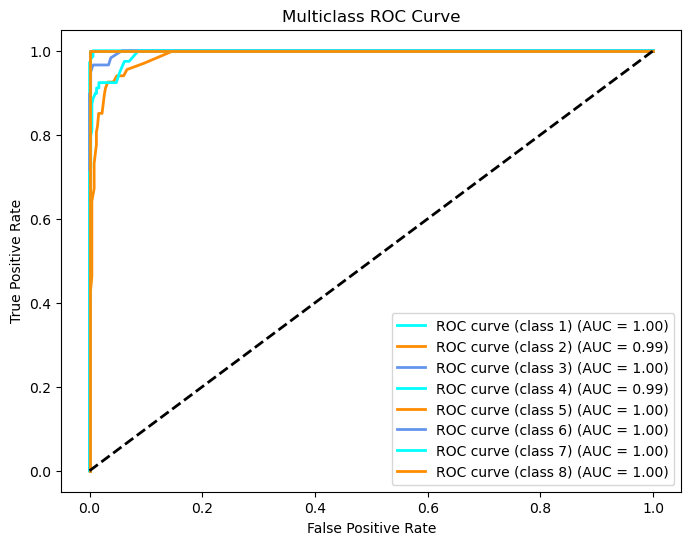

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_score = final_model.predict_proba(x_test)

y_test_bin = label_binarize(y_test, classes=list(range(54)))


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(8), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {i + 1}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='best')
plt.show()

# Prediction of capacity_mw

In [138]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,2011.00,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1997.09,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,1997.09,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2004.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,Gas
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,2015.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,2016.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,Coal
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,1997.09,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,1997.09,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1997.09,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal


In [140]:
from scipy.stats import zscore 
out_features = df[['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]
z=np.abs(zscore(out_features))
z[np.isnan(z)] = 0
z

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,1.149805,0.878280,1.069196,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000
1,0.386977,0.587311,0.593788,0.000048,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000
2,0.486679,0.116179,1.682394,0.000048,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000
3,0.324240,0.439989,2.889052,0.531115,0.0,6.809773e-01,5.544458e-01,5.499881e-01,0.645224,0.651857
4,2.498942,0.125479,1.027976,1.376672,0.0,2.266352e-01,1.220581e+00,1.312471e+00,0.971893,1.544399
...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,1.453540,0.0,1.707094e-16,8.493441e-01,7.768097e-01,0.576172,0.631964
903,0.548060,1.366853,0.145644,0.000048,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000
904,0.509909,0.974707,0.391673,0.000048,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000
905,0.417498,0.518793,0.772866,0.000048,0.0,1.707094e-16,1.591265e-16,1.581013e-16,0.000000,0.000000


In [141]:
df1 = df[(z<3).all(axis = 1)]
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,2011.00,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1997.09,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,1997.09,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2004.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,Gas
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,2015.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,2016.00,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,Coal
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,1997.09,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Solar
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,1997.09,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Wind
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1997.09,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority,Coal


In [142]:
df1.skew()

capacity_mw              1.979914
latitude                -0.109823
longitude                0.921980
commissioning_year      -0.845517
year_of_capacity_data    0.000000
generation_gwh_2014      1.526648
generation_gwh_2015      1.389889
generation_gwh_2016      1.413144
generation_gwh_2017      1.278735
generation_gwh_2018      1.315481
dtype: float64

In [143]:
from scipy.stats import boxcox 

df1['capacity_mw'], _ = boxcox(df1['capacity_mw'] + 1)  
df1['longitude'], _ = boxcox(df1['longitude'] + 1)  
df1['generation_gwh_2014'], _ = boxcox(df1['generation_gwh_2014'] + 1)
df1['generation_gwh_2015'], _ = boxcox(df1['generation_gwh_2015'] + 1)  
df1['generation_gwh_2016'], _ = boxcox(df1['generation_gwh_2016'] + 1)  
df1['generation_gwh_2017'], _ = boxcox(df1['generation_gwh_2017'] + 1)  
df1['generation_gwh_2018'], _ = boxcox(df1['generation_gwh_2018'] + 1)


In [144]:
df1['commissioning_year'] = np.square(df1['commissioning_year']) 


In [145]:
df1.skew()

capacity_mw              0.015527
latitude                -0.109823
longitude                0.000000
commissioning_year      -0.820463
year_of_capacity_data    0.000000
generation_gwh_2014     -0.243975
generation_gwh_2015     -0.309166
generation_gwh_2016     -0.309194
generation_gwh_2017     -0.340677
generation_gwh_2018     -0.354764
dtype: float64

In [146]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))
    
df1  

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
0,0.0,0.0,0.0,600.0,1.232447,28.1839,0.231149,4.044121e+06,228.0,109.0,128.0,1.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,6.0
1,0.0,0.0,1.0,462.0,4.329544,24.7663,0.231149,3.988368e+06,257.0,174.0,173.0,2.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,1.0
2,0.0,0.0,2.0,795.0,3.520921,21.9038,0.231149,3.988368e+06,2.0,21.0,205.0,2.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,7.0
3,0.0,0.0,3.0,0.0,4.609929,23.8712,0.231149,4.016016e+06,5.0,22.0,58.0,2.0,2019.0,63.226981,68.085746,65.561639,56.298845,51.306628,0.0,2.0
4,0.0,0.0,4.0,1.0,6.806555,21.9603,0.231149,4.060225e+06,5.0,22.0,58.0,2.0,2019.0,156.402932,197.645128,186.312809,173.239464,185.677859,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.0,0.0,844.0,437.0,6.709663,16.2949,0.231149,4.064256e+06,5.0,22.0,58.0,2.0,2019.0,137.967319,0.836485,31.625412,65.010425,53.876227,0.0,1.0
903,0.0,0.0,845.0,764.0,1.361445,12.8932,0.231149,3.988368e+06,114.0,77.0,22.0,0.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,6.0
904,0.0,0.0,846.0,833.0,3.140531,15.2758,0.231149,3.988368e+06,5.0,21.0,260.0,2.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,7.0
905,0.0,0.0,847.0,482.0,4.151145,24.3500,0.231149,3.988368e+06,91.0,59.0,82.0,2.0,2019.0,137.967319,121.666923,113.657441,116.201038,108.648473,0.0,1.0


# Checking correlation

In [147]:
cor = df1.corr()
cor

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,primary_fuel
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.325100,0.008111,-0.138173,0.018929,-0.020506,0.112502,-0.005866,0.052364,0.028966,NaN,0.058930,0.029976,0.028624,0.048725,0.034498,NaN,0.049526
gppd_idnr,NaN,NaN,0.325100,1.000000,-0.585589,-0.090999,-0.405150,0.003078,0.628604,0.402598,0.601207,-0.465397,NaN,0.304641,0.314143,0.297772,0.286036,0.291334,NaN,0.624729
capacity_mw,NaN,NaN,0.008111,-0.585589,1.000000,0.048305,0.337034,0.241696,-0.498275,-0.396832,-0.337128,0.477422,NaN,0.007156,-0.017282,0.004249,0.003924,-0.008845,NaN,-0.523672
latitude,NaN,NaN,-0.138173,-0.090999,0.048305,1.000000,-0.071742,0.102944,-0.061001,0.069393,-0.125811,-0.202748,NaN,0.052737,0.039807,0.044077,0.023759,0.030694,NaN,0.000041
longitude,NaN,NaN,0.018929,-0.405150,0.337034,-0.071742,1.000000,0.136095,-0.298603,-0.241851,-0.322273,0.301032,NaN,-0.117067,-0.136395,-0.096173,-0.107722,-0.102197,NaN,-0.406154
commissioning_year,NaN,NaN,-0.020506,0.003078,0.241696,0.102944,0.136095,1.000000,-0.029862,-0.011610,-0.026951,0.020857,NaN,0.117559,0.129391,0.174698,0.142169,0.138793,NaN,-0.148405
owner,NaN,NaN,0.112502,0.628604,-0.498275,-0.061001,-0.298603,-0.029862,1.000000,0.764899,0.406857,-0.373751,NaN,0.212194,0.230931,0.233075,0.233521,0.243279,NaN,0.270518
source,NaN,NaN,-0.005866,0.402598,-0.396832,0.069393,-0.241851,-0.011610,0.764899,1.000000,0.144960,-0.497655,NaN,0.166402,0.181096,0.182778,0.183127,0.190779,NaN,0.036949


In [148]:
cor['capacity_mw'].sort_values(ascending = False)

capacity_mw               1.000000
geolocation_source        0.477422
longitude                 0.337034
commissioning_year        0.241696
latitude                  0.048305
name                      0.008111
generation_gwh_2014       0.007156
generation_gwh_2016       0.004249
generation_gwh_2017       0.003924
generation_gwh_2018      -0.008845
generation_gwh_2015      -0.017282
url                      -0.337128
source                   -0.396832
owner                    -0.498275
primary_fuel             -0.523672
gppd_idnr                -0.585589
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: capacity_mw, dtype: float64

In [149]:
#dropping NAN correlation with target variable column 
df1.drop(['country','country_long','year_of_capacity_data','generation_data_source'], axis=1, inplace=True)
df1

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel
0,0.0,600.0,1.232447,28.1839,0.231149,4.044121e+06,228.0,109.0,128.0,1.0,137.967319,121.666923,113.657441,116.201038,108.648473,6.0
1,1.0,462.0,4.329544,24.7663,0.231149,3.988368e+06,257.0,174.0,173.0,2.0,137.967319,121.666923,113.657441,116.201038,108.648473,1.0
2,2.0,795.0,3.520921,21.9038,0.231149,3.988368e+06,2.0,21.0,205.0,2.0,137.967319,121.666923,113.657441,116.201038,108.648473,7.0
3,3.0,0.0,4.609929,23.8712,0.231149,4.016016e+06,5.0,22.0,58.0,2.0,63.226981,68.085746,65.561639,56.298845,51.306628,2.0
4,4.0,1.0,6.806555,21.9603,0.231149,4.060225e+06,5.0,22.0,58.0,2.0,156.402932,197.645128,186.312809,173.239464,185.677859,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,844.0,437.0,6.709663,16.2949,0.231149,4.064256e+06,5.0,22.0,58.0,2.0,137.967319,0.836485,31.625412,65.010425,53.876227,1.0
903,845.0,764.0,1.361445,12.8932,0.231149,3.988368e+06,114.0,77.0,22.0,0.0,137.967319,121.666923,113.657441,116.201038,108.648473,6.0
904,846.0,833.0,3.140531,15.2758,0.231149,3.988368e+06,5.0,21.0,260.0,2.0,137.967319,121.666923,113.657441,116.201038,108.648473,7.0
905,847.0,482.0,4.151145,24.3500,0.231149,3.988368e+06,91.0,59.0,82.0,2.0,137.967319,121.666923,113.657441,116.201038,108.648473,1.0


<Axes: >

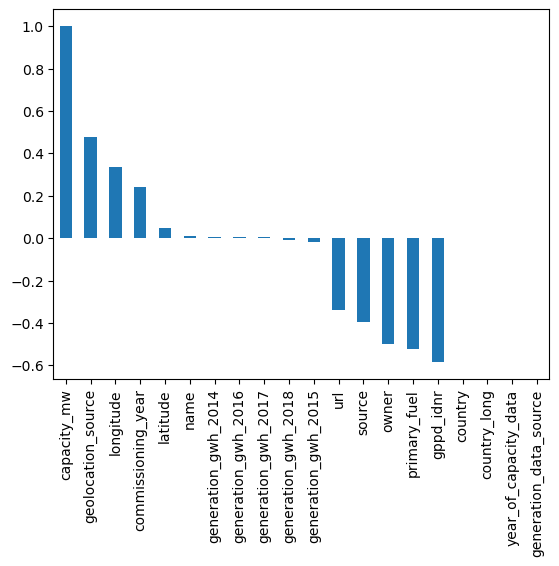

In [150]:
cor['capacity_mw'].sort_values(ascending = False).plot(kind='bar')

# Seperating feautures and model

In [153]:
x= df1.drop("capacity_mw", axis=1)
y=df1['capacity_mw']

In [154]:
x.shape

(849, 15)

In [155]:
y.shape

(849,)

# Feature Scaling and standardisation

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,name,gppd_idnr,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel
0,-1.730012,0.718118,1.159233,-0.928072,1.181136,2.014449,1.395536,0.432103,-1.034548,0.327200,0.356092,0.359399,0.360086,0.375133,1.172783
1,-1.725932,0.155048,0.599617,-0.509206,-0.074733,2.360753,2.818140,1.056786,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133,-0.979601
2,-1.721851,1.513760,0.130895,-2.364000,-0.074733,-0.684339,-0.530451,1.501005,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133,1.603260
3,-1.717771,-1.730012,0.453048,2.442077,0.548050,-0.648514,-0.508564,-0.539626,0.407704,-1.046002,-0.731478,-0.683964,-0.905238,-0.925585,-0.549124
4,-1.713691,-1.725932,0.140147,1.253967,1.543891,-0.648514,-0.508564,-0.539626,0.407704,0.665917,1.898269,1.935543,1.564919,2.122435,-0.979601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,1.713691,0.053043,-0.787537,0.219867,1.634693,-0.648514,-0.508564,-0.539626,0.407704,0.327200,-2.096477,-1.420156,-0.721222,-0.867297,-0.979601
845,1.717771,1.387274,-1.344551,0.409530,-0.074733,0.653113,0.695177,-1.039372,-2.476800,0.327200,0.356092,0.359399,0.360086,0.375133,1.172783
846,1.721851,1.668809,-0.954410,-0.235268,-0.074733,-0.648514,-0.530451,2.264506,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133,1.603260
847,1.725932,0.236653,0.531449,-0.768094,-0.074733,0.378458,0.301225,-0.206462,0.407704,0.327200,0.356092,0.359399,0.360086,0.375133,-0.979601


In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.342607,name
1,4.203153,gppd_idnr
2,1.136138,latitude
3,1.348882,longitude
4,1.121196,commissioning_year
5,3.772558,owner
6,3.924556,source
7,2.985173,url
8,3.264392,geolocation_source
9,4.234549,generation_gwh_2014


# Building model

In [158]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import LinearRegression 

In [159]:
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR  = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    accuracy = r2_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)
    

Best accuracy is 0.6265321151404102 at random state 156


In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = rs) 


In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.linear_model import Lasso, Ridge

In [163]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train= LR.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_LR))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_LR))
print('mean_squared_error is', mean_squared_error(y_test, pred_LR))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_LR)))

r2_score is  0.6265321151404102
r2_score of training is  0.4928049900502556
mean_absolute_error is 0.8237152954576359
mean_squared_error is 1.083610168533223
root_mean_squared_error is 1.0409659785666499


In [164]:
RFR=RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_RFR))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_RFR))
print('mean_squared_error is', mean_squared_error(y_test, pred_RFR))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_RFR)))

r2_score is  0.8141308329433
r2_score of training is  0.9707000012831742
mean_absolute_error is 0.5320177456333842
mean_squared_error is 0.5392959544973005
root_mean_squared_error is 0.7343677243025462


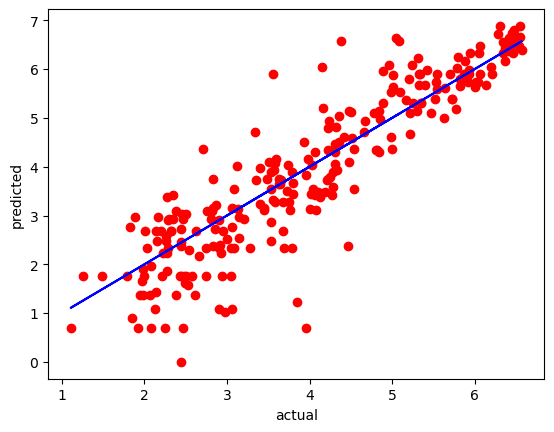

In [170]:
plt.scatter(x=pred_RFR, y=y_test, color='r')
plt.plot(pred_RFR, pred_RFR, color='b')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [165]:
knn=KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_knn))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_knn))
print('mean_squared_error is', mean_squared_error(y_test, pred_knn))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_knn)))

r2_score is  0.6895438461535268
r2_score of training is  0.7018563016349306
mean_absolute_error is 0.7089138905642142
mean_squared_error is 0.9007827950674584
root_mean_squared_error is 0.9490957776049045


In [166]:
lasso=Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train= lasso.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_lasso))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_lasso))
print('mean_squared_error is', mean_squared_error(y_test, pred_lasso))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_lasso)))

r2_score is  -0.0004522892265872436
r2_score of training is  0.0
mean_absolute_error is 1.4649682309913261
mean_squared_error is 2.9027938349929405
root_mean_squared_error is 1.7037587373196184


In [167]:
ridge=Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train= ridge.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_ridge))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_ridge))
print('mean_squared_error is', mean_squared_error(y_test, pred_ridge))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_ridge)))

r2_score is  0.6266840519117156
r2_score of training is  0.4928002299934665
mean_absolute_error is 0.8240499249767397
mean_squared_error is 1.083169326798136
root_mean_squared_error is 1.0407542105598881


In [168]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(x_train, y_train)
pred_ETR = ETR.predict(x_test)
pred_train= ETR.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_ETR))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_ETR))
print('mean_squared_error is', mean_squared_error(y_test, pred_ETR))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_ETR)))

r2_score is  0.8208888083616709
r2_score of training is  1.0
mean_absolute_error is 0.5062350746737309
mean_squared_error is 0.5196878136666707
root_mean_squared_error is 0.7208937603188633


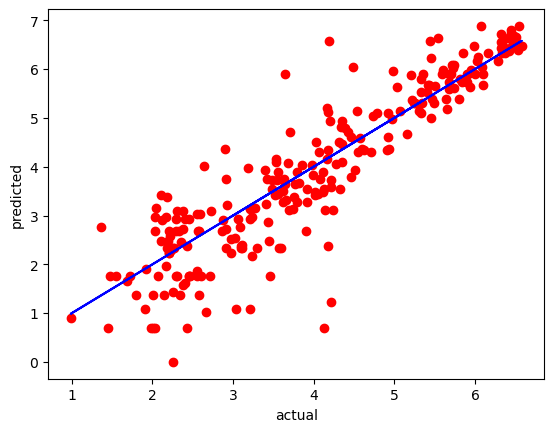

In [169]:
plt.scatter(x=pred_ETR, y=y_test, color='r')
plt.plot(pred_ETR, pred_ETR, color='b')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

# cross val score

In [171]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_LR)-score.mean())

[0.52937441 0.55574942 0.50883885 0.52926945 0.46283734]
0.5172138936747555
Difference is 0.10931822146565473


In [172]:
score = cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_RFR)-score.mean())

[0.73929253 0.79793394 0.76007194 0.81402527 0.77962367]
0.7781894716339264
Difference is 0.03594136130937364


In [173]:
score = cross_val_score(knn,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_knn)-score.mean())

[0.57480336 0.53247559 0.63116853 0.64565428 0.59829543]
0.5964794393839897
Difference is 0.030052675756420455


In [174]:
score = cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_lasso)-score.mean())

[-0.00041975 -0.00058154 -0.00152941 -0.02055798 -0.0094124 ]
-0.0065002159197412816
Difference is 0.6330323310601514


In [175]:
score = cross_val_score(ridge,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_ridge)-score.mean())

[0.53002794 0.55634409 0.50866672 0.52940454 0.46313355]
0.5175153653225963
Difference is 0.10901674981781384


In [176]:
score = cross_val_score(ETR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_ETR)-score.mean())

[0.74290303 0.75678249 0.76015653 0.80857528 0.74945864]
0.7635751936452934
Difference is -0.13704307850488318


Considering the cross val score and the model individual performance, selecting ETR as the best fitting model.

# Hyperparameter tuning

In [178]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False],  
    'random_state': [10, 50, 100]  
 
}
estimator = ExtraTreesRegressor()

gscv = GridSearchCV(estimator, param, cv=5)

In [179]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150],
                         'random_state': [10, 50, 100]})

In [180]:
gscv.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 150,
 'random_state': 50}

In [183]:
Model = ExtraTreesRegressor(bootstrap=False, max_depth = 30, n_estimators=150, random_state=50, max_features='sqrt')

In [184]:
Model.fit(x_train, y_train)
pred = Model.predict(x_test)
print('r2_score is ',r2_score(y_test, pred))
print('mean_absolute_error is', mean_absolute_error(y_test, pred))
print('mean_squared_error is', mean_squared_error(y_test, pred))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred)))

r2_score is  0.8354214217139383
mean_absolute_error is 0.4915972953387447
mean_squared_error is 0.4775217044982768
root_mean_squared_error is 0.6910294526995769


In [185]:
#saving model 
import pickle 
filename='gloal_power_plant.pkl'
pickle.dump(Model, open(filename,'wb'))

In [186]:
import pickle 
loaded_model = pickle.load(open('gloal_power_plant.pkl', 'rb'))
res = loaded_model.score(x_test, y_test)
print(res*100)

83.54214217139383


In [187]:
final = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index=['predicted','original'])
final

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
predicted,2.943880,4.615019,5.382252,6.329953,5.877514,6.42202,5.112067,2.653811,4.047045,5.596021,...,3.966576,6.079905,2.181549,5.394375,4.410128,5.589181,1.782747,5.204456,3.872639,5.019053
original,2.516019,4.300397,5.891495,6.563232,5.891495,6.47178,5.522555,3.030088,3.420597,5.987056,...,3.123044,5.891495,1.975257,6.079399,5.144489,5.301313,1.361445,5.301313,3.130080,5.521457


Accessing a vast database containing information on more than 35,000 power plants globally, including key details like capacity, fuel type, and location, this project provides a solid foundation for conducting thorough analyses and gaining valuable insights into the global energy landscape. Also both primary fuel and capacity has been predicted. This contributes to a deeper understanding of energy trends and assisting in informed decision-making towards sustainable energy transitions.